<a href="https://colab.research.google.com/github/YahyaMansoor/Data-Analytics-exercises/blob/main/Logistic_Regression_Univariate_Classification_II_v0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Logistic Regression - Univariate Classification II

---

---

### Recap

In [ ]:
# Import the required modules and load the heart disease dataset.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

csv_file = 'https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/uci-heart-disease/heart.csv'
df = pd.read_csv(csv_file)

# Print the number of records with and without heart disease.
print("Number of records in each label are")
print(df['target'].value_counts())

# Print the percentage of each label
print("\nPercentage of records in each label are")
print(df['target'].value_counts() * 100 / df.shape[0], "\n")

# Print the first five rows of Dataframe.
df.head()

Number of records in each label are
1    165
0    138
Name: target, dtype: int64

Percentage of records in each label are
1    54.455446
0    45.544554
Name: target, dtype: float64 



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


-----

#### Activity 1: Sigmoid Function

The sigmoid function, in maths, classifies any data point between **0** and **1**. The graph of a sigmoid function follows the shape of English letter **S**. Mathematically, the sigmoid function is given as

$$y =  \frac{1}{1 + e^{-x}}$$

where,  

- $y$ is the output of the sigmoid function

- $x$ is an independent variable

- $e$ is Euler's constant
 
The $x$ takes all the values between $- \infty$ to $\infty$ i.e., $x \in (-\infty, \infty)$ and the $y$ ranges between $0$ to $1$ i.e., $y \in (0, 1)$.

**Q: What is so great about sigmoid function in machine learning?** 

The sigmoid function in the context of machine learning returns the probability of occurrence of an event. As you know, the probability of an event ranges between 0 and 1. So does the output of the sigmoid function. Hence, usage of sigmoid function to calculate probabilities to classify outcomes (say 0 and 1) seems like a natural fit.

Before we go deep into the sigmoid function, let's create a function in Python and name it `sigmoid()` that takes a series/array as an input and returns a numeric output.


In [ ]:
# S1.1: Create a sigmoid function using the above formula.
def sigmoid(x):
  return pd.Series(1 / (1 + np.exp(-x)))

Now that you have the sigmoid function, you can calculate the probabilities of a few random integers between -10 and 10 and plot the output on a scatter plot with the corresponding input to see the shape of the curve.

In [ ]:
# S1.2: Create a numpy array having 100 random integers between -10 and 10. Pass the array as an input to the 'sigmoid()' function.
rand_int_array_input = np.random.randint(-10, 11, 100)
print(f"Random {len(rand_int_array_input)} integers:\n{rand_int_array_input}\n")

rand_int_array_output = sigmoid(rand_int_array_input)
print(f"Corresponding sigmoid function output:\n{rand_int_array_output}")

Random 100 integers:
[  9   8  -1  10   2   4  -2   1   1  -7  10   1   0   3  -5  -6  -3 -10
  -4  -3  -4   2   6   2   9   9  -4  -8  -6  -7   1  -1  -2  -7  -5   3
   7   4  -4  -2  -8  10   9  -1   8  -8   9   8   8  -3  10  -5  -5  -6
   7  -7  -5  -1  -4  -8   1  -5   2  -7   9   2   9   9  -4   1  -6   7
  -4   0  -7  -1  -1   5   7  -5   5   4  -6  -8  -4  -2  -6  -4  10  -6
   8   0   6   1  -1   2   2   6  -9  -6]

Corresponding sigmoid function output:
0     0.999877
1     0.999665
2     0.268941
3     0.999955
4     0.880797
        ...   
95    0.880797
96    0.880797
97    0.997527
98    0.000123
99    0.002473
Length: 100, dtype: float64


As you can see, the sigmoid function output is in the range of 0 to 1.

Let's create a scatter plot between the random integers and their corresponding sigmoid function output to check the shape of the curve.

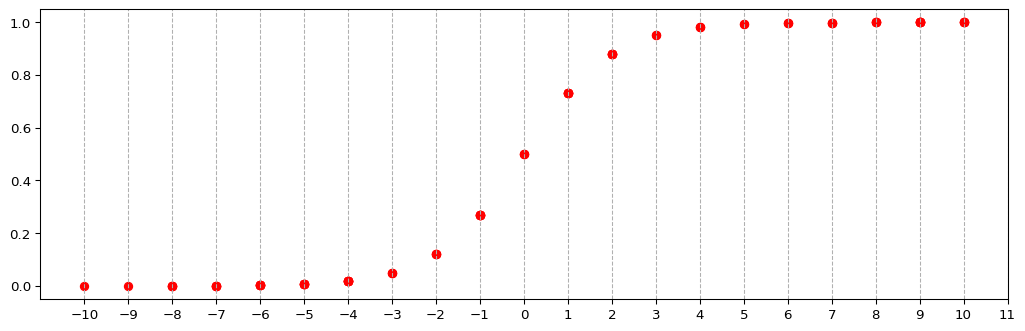

In [ ]:
# S1.3: Create a scatter plot for output array for the sigmoid function
plt.figure(figsize = (13, 4), dpi = 96)
plt.scatter(rand_int_array_input, rand_int_array_output, color = 'red')
plt.xticks(np.arange(-10, 12))
plt.grid(axis = 'x', linestyle = '--')
plt.show()

As you can see, the arrangement of the points appears to form a shape of the English letter 'S'. 

**Important Observations**

- *Observation 1:* If $x = 0$, then the output of the sigmoid function is $y = 0.5$ because

  $$y = \frac{1}{1 + e^{0}} = \frac{1}{1 + 1} = \frac{1}{2} = 0.5$$

  Similarly, if $x = -1$, then the output of the sigmoid function is $y < 0.5$ because

  $$y = \frac{1}{1 + e^{1}} = \frac{1}{1 + 2.71} = \frac{1}{3.71} < 0.5$$

  And, if $x = 1$, then the output of the sigmoid function is $y > 0.5$ because

  $$y = \frac{1}{1 + e^{-1}} = \frac{e}{e + 1} = \frac{2.71}{3.71} = 0.73 > 0.5$$

- *Observation 2:* From the curve, you can also see that as the values on the $x$-axis increase, the values on the $y$-axis also increase. So you can say that **the sigmoid curve is continuously increasing**.

Based on the above two observations, you can say that the input values to the sigmoid function should be both negative and positive. Hence, before building a univariate logistic regression model, first inspect the polarity (i.e. sign) of values of the independent variable. If all the values are non-negative, then use the standard scaler method to normalise values so that you get a few negative values as well in the independent variable.

---

#### Activity 2: Classification Criteria in Logistic Regression

To classify an outcome as either **yes** or **no** (1 or 0), you need to randomly assign a probability value as the **threshold value**. Let's say the threshold probability value is $0.5$. If for any input value, the corresponding sigmoid function output is 
- less than 0.5, then you can label that outcome as 0 or **no**
- else, you can label that outcome as 1 or **yes**.

Let's create a function called `predict()` in Python that takes the output of the `sigmoid()` function and returns a Pandas series containing 0s and 1s as the output.

In [ ]:
# S2.1: Create the 'predict()' function as described above.
def predict(sigmoid_output, threshold): 
  y_pred = [1 if output >= threshold else 0 for output in sigmoid_output]
  return pd.Series(y_pred)

In the above code,

- we iterate through each item of the `sigmoid_output` series, 

- compare each item with the threshold value,

- if the item is is greater than or equals to 0.5, we add `1` to a Python list, else add `0` to it,

- convert the Python list to a Pandas series using the `pd.Series()` function,

- return the Pandas series created

Now let's use the `predict()` function to classify the `sigmoid()` function outputs as 0 and 1.

In [ ]:
# S2.2: Use the 'predict()' function to classify the 'sigmoid()' function outputs as 0 and 1.
threshold = 0.5
y_pred = predict(rand_int_array_output, threshold)
y_pred

0     1
1     1
2     0
3     1
4     1
     ..
95    1
96    1
97    1
98    0
99    0
Length: 100, dtype: int64

Let's create a scatter plot between the random integers and their corresponding binary labels (i.e. 0 and 1).

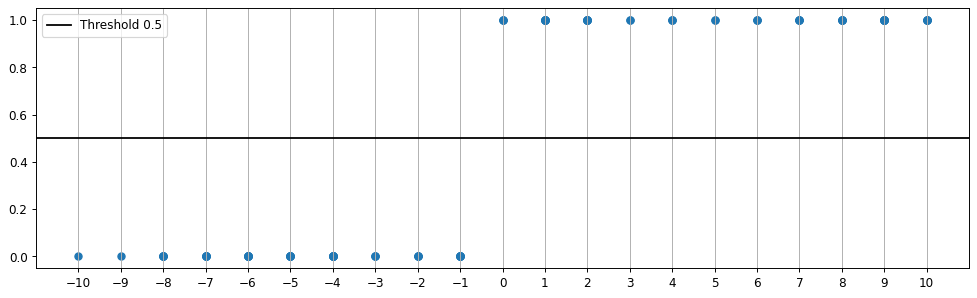

In [ ]:
# S2.3: Create a scatter plot between the random integers and their corresponding binary labels (i.e. 0 and 1).
plt.figure(figsize = (14, 4), dpi = 86)
plt.scatter(rand_int_array_input, y_pred)
plt.axhline(threshold, color= 'black' , label=f"Threshold {threshold}")
plt.xticks(np.arange(-10, 11))
plt.grid(axis = 'x')
plt.legend()
plt.show()

With different threshold values, you will get different classifications but the most optimal threshold value is that value which classifies most sigmoid function outputs correctly as 0 and 1.

Let's consider five different threshold probability values and classify the sigmoid function outputs as 0 and 1 based on them. Let's also create their scatter plots.

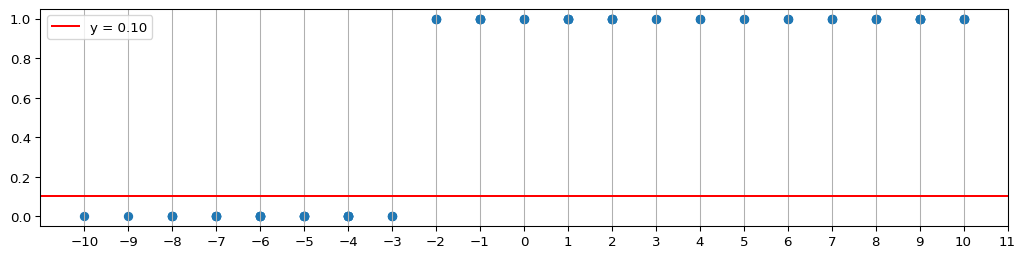

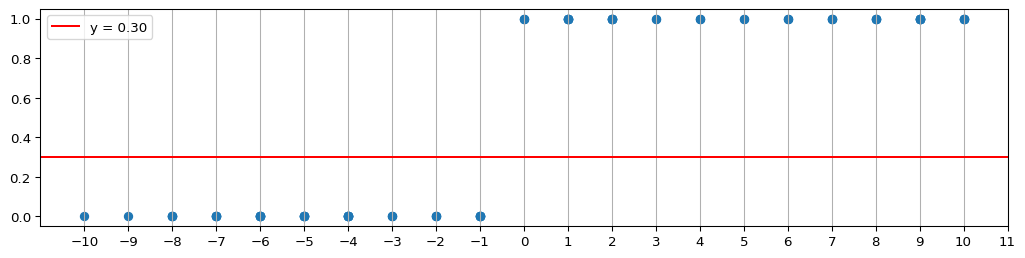

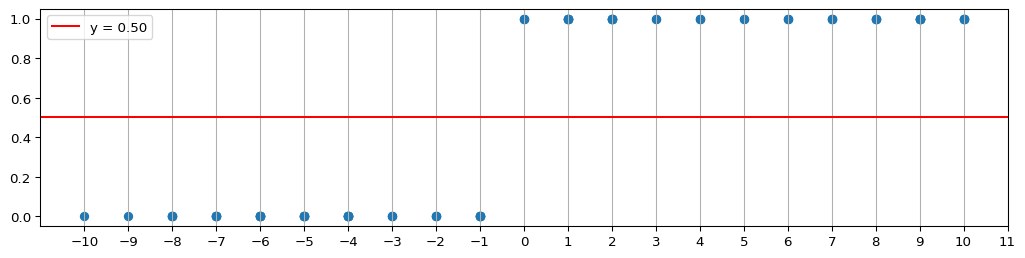

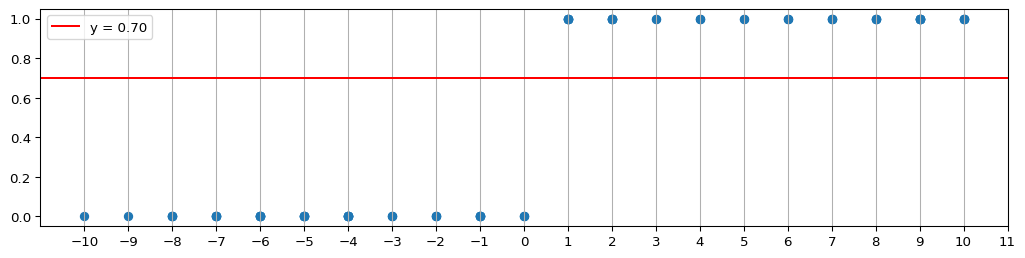

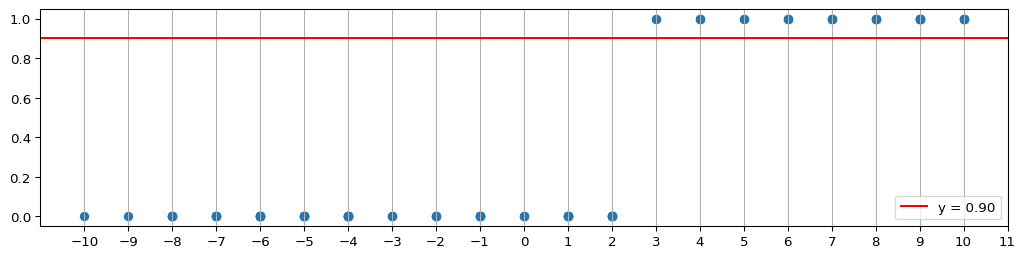

In [ ]:
# S2.4: Consider 5 different threshold probability values and classify the sigmoid function outputs as 0 and 1 based on them. 
# Also create their scatter plots.
thresholds = np.linspace(0.1, 0.9, 5)
predictions = [[t, list(predict(rand_int_array_output, t))] for t in thresholds]

for i in range(len(predictions)):
  plt.figure(figsize = (13, 3), dpi = 96)
  plt.scatter(rand_int_array_input, predictions[i][1])
  plt.axhline(y = predictions[i][0], label = f'y = {predictions[i][0]:.2f}', color = 'r')
  plt.xticks(np.arange(-10, 12))
  plt.grid(axis = 'x')
  plt.legend()
  plt.show()

Now let's apply the same logic to classify the heart disease patients as 0 and 1 based on their cholesterol levels. But before that let's check the range of values in the `chol` column.

Cholesterol Descriptive Statistics:
count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64



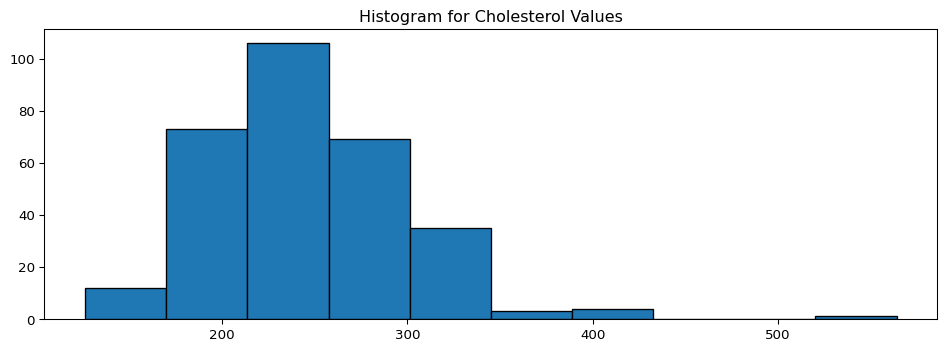

In [ ]:
# S2.5: Get the descriptive statistics for the 'chol' column.
print(f"Cholesterol Descriptive Statistics:\n{df['chol'].describe()}\n")

plt.figure(figsize = (12, 4), dpi = 96)
plt.title("Histogram for Cholesterol Values")
plt.hist(df['chol'], bins = 'sturges', edgecolor = 'black')
plt.show()

As you can see, all the values in the cholesterol column are non-negative. Let's first normalise them by calculating their $Z$-scores (or standard scaler). 

Descriptive statistics for the normalised cholesterol values:
count    3.030000e+02
mean    -8.839647e-17
std      1.000000e+00
min     -2.320322e+00
25%     -6.803688e-01
50%     -1.208554e-01
75%      5.447726e-01
max      6.130260e+00
Name: chol, dtype: float64



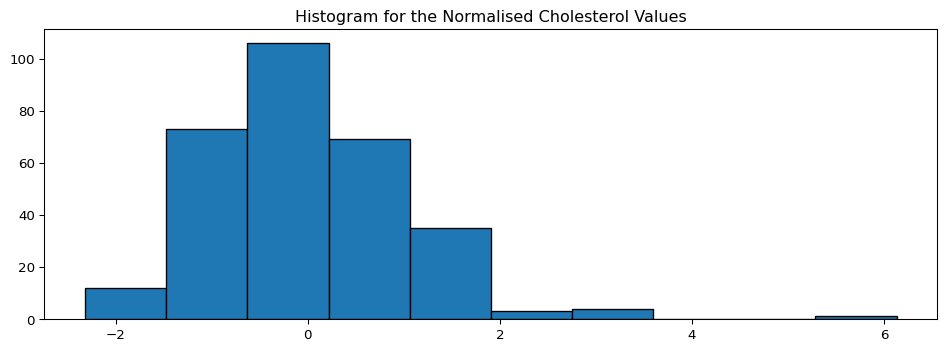

In [ ]:
# S2.6: Normalise the 'chol' column values using the standard scaler method.
def standard_scaler(series):
  new_series = (series - series.mean()) / series.std()
  return new_series

chol_scaled = standard_scaler(df['chol'])
print(f"Descriptive statistics for the normalised cholesterol values:\n{chol_scaled.describe()}\n")

plt.figure(figsize = (12, 4), dpi = 96)
plt.title("Histogram for the Normalised Cholesterol Values")
plt.hist(chol_scaled, bins = 'sturges', edgecolor = 'black')
plt.show()

In [ ]:
# S2.7: Calculate the sigmoid output for both the scaled (or normalised) and non-scaled cholesterol values.
# Non-scaled cholesterol values.
chol_sigmoid_output = sigmoid(df['chol'])
print(f"Descriptive stats for sigmoid output of non-scaled cholesterol values:\n{chol_sigmoid_output.describe()}\n")

# Scaled cholesterol values.
chol_scaled_sigmoid_output = sigmoid(chol_scaled)
print(f"Descriptive stats for sigmoid output of scaled cholesterol values:\n{chol_scaled_sigmoid_output.describe()}")

Descriptive stats for sigmoid output of non-scaled cholesterol values:
count    303.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: chol, dtype: float64

Descriptive stats for sigmoid output of scaled cholesterol values:
count    303.000000
mean       0.492837
std        0.198175
min        0.089454
25%        0.336179
50%        0.469823
75%        0.632919
max        0.997829
Name: chol, dtype: float64


As you can see, all the probabilities (sigmoid outputs) for the non-scaled cholesterol values are 1 whereas they range between 0 and 1 for the scaled `chol` values.

Now for different thresholds between 0 and 1, let's classify whether a patient has heart disease or not based on the scaled cholesterol values.



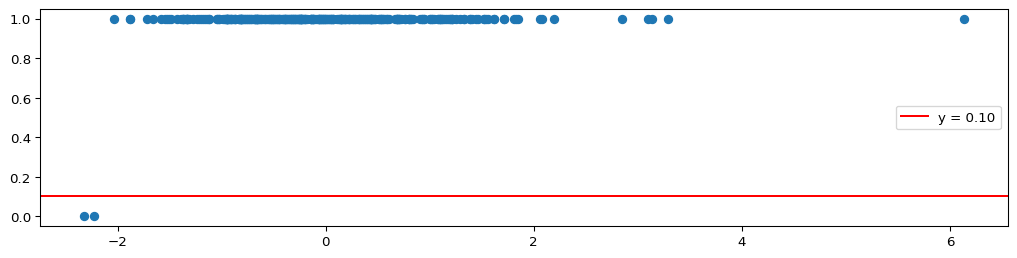

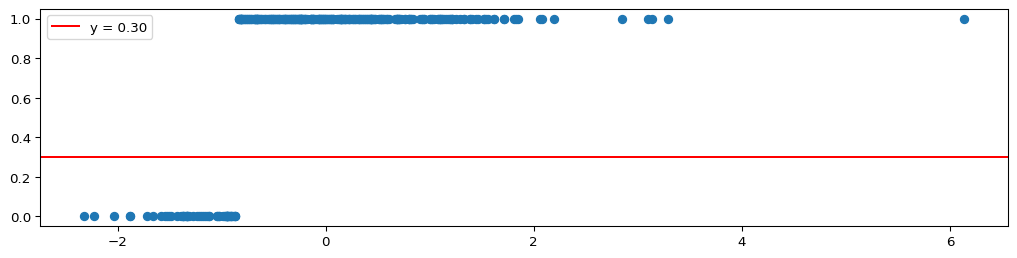

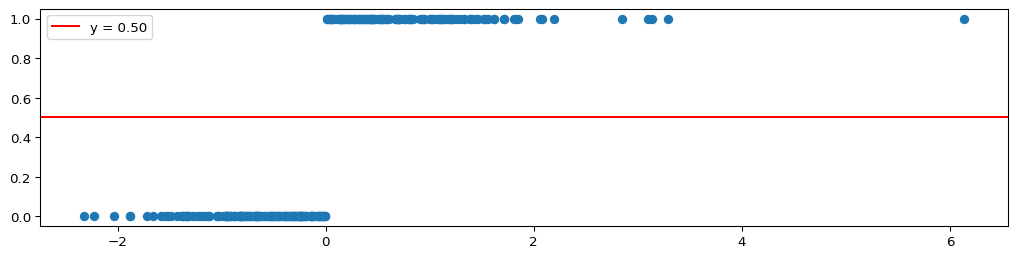

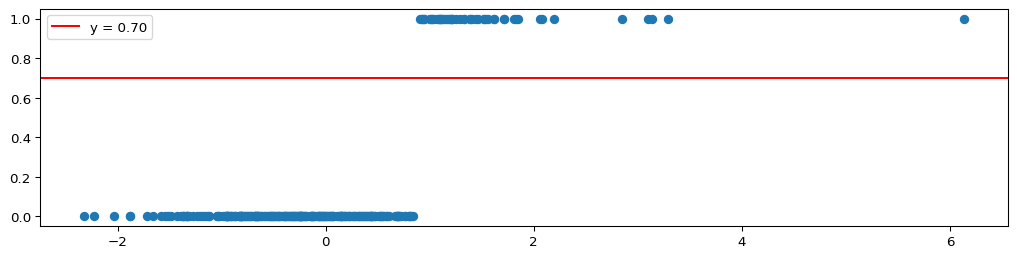

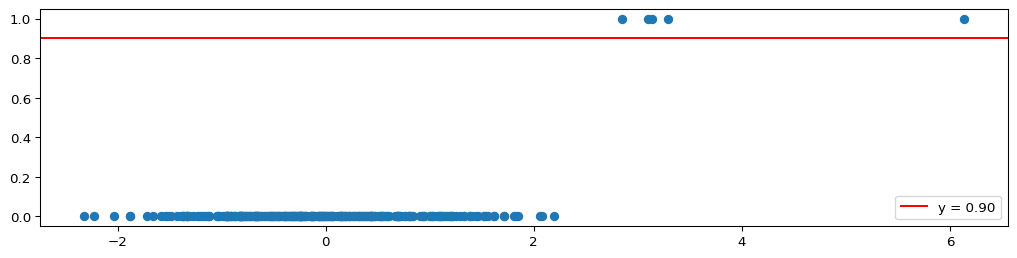

In [ ]:
# S2.8: Consider 5 different threshold probability values and classify the sigmoid function outputs as 0 and 1 based on them. 
# Also create their scatter plots.
thresholds = np.linspace(0.1, 0.9, 5)
heart_disease_pred = [[t, predict(chol_scaled_sigmoid_output, t)] for t in thresholds]

for i in range(len(heart_disease_pred)):
  plt.figure(figsize = (13, 3), dpi = 96)
  plt.scatter(chol_scaled, heart_disease_pred[i][1])
  plt.axhline(y = heart_disease_pred[i][0], label = f'y = {heart_disease_pred[i][0]:.2f}', color = 'r')
  plt.legend()
  plt.show()

Now let's find out the number of 1s and 0s classified by the `predict()` function w.r.t. the threshold of 0.5.

In [ ]:
# S2.9: Find out the number of 1s and 0s classified by the 'predict()' function for a threshold of 0.5.
print("Threshold:", heart_disease_pred[2][0])
print(f"\nPrediction counts:\n{heart_disease_pred[2][1].value_counts()}")
print(f"\nActual target counts:\n{df['target'].value_counts()}")

Threshold: 0.5

Prediction counts:
0    167
1    136
dtype: int64

Actual target counts:
1    165
0    138
Name: target, dtype: int64


As you can see the number of values classified as 0 and 1 is almost the same as the number of actual 0s and 1s in the dataset. 

However, are the predicted 0s  correctly classified as 0s and the predicted 1s  correctly classified as 1s? 

Let's find out by creating a confusion matrix.

In [ ]:
# S2.10: Create a confusion matrix for the predicted values.
from sklearn.metrics import confusion_matrix

print(confusion_matrix(df['target'], heart_disease_pred[2][1]))

[[ 65  73]
 [102  63]]


There are a lot of false positives and false negatives in the predicted values. Let's print the f1-scores.

In [ ]:
# S2.11: # Print the classification report for the predicted values.
from sklearn.metrics import classification_report

print(classification_report(df['target'], heart_disease_pred[2][1]))

              precision    recall  f1-score   support

           0       0.39      0.47      0.43       138
           1       0.46      0.38      0.42       165

    accuracy                           0.42       303
   macro avg       0.43      0.43      0.42       303
weighted avg       0.43      0.42      0.42       303



The f1-scores are also lower. Hence, clearly, the cholesterol values alone cannot  accurately predict whether a person has heart disease or not. You need to consider more features to build a logistic regression model for this purpose.
.

---

---